# Отток клиентов [Финальный проект]

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

**Цель:** предложить модель прогнозирования отток клиентов

# Описание данных

Оператор предоставляет 2 типа услуг:

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.

2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic). 

Также доступны следующие услуги:

- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);

- Выделенная линия технической поддержки (TechSupport);

- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);

- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies)

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

**Данные состоят из файлов, полученных из разных источников:**

**contract.csv** — информация о договоре

**personal.csv** — персональные данные клиента;

**internet.csv** — информация об интернет-услугах;

**phone.csv** — информация об услугах телефонии.

Во всех файлах столбец customerID содержит код клиента. 

Информация о договорах актуальна на 1 февраля 2020.

**Целевой признак** - дата окончания договора EndDate

# Шаг 1. Анализ данных

Импортируем  исходные данные и необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler
!pip install lightgbm
import lightgbm as lgb
!pip install catboost
from catboost import CatBoostClassifier

In [2]:
contract = pd.read_csv('C:/Users/Anna/Desktop/final_provider/contract.csv')
contract.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


In [3]:
internet = pd.read_csv('C:/Users/Anna/Desktop/final_provider/internet.csv')
internet.head(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


In [4]:
personal = pd.read_csv('C:/Users/Anna/Desktop/final_provider/personal.csv')
personal.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


In [5]:
phone = pd.read_csv('C:/Users/Anna/Desktop/final_provider/phone.csv')
phone.head(10)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


**Проанализируем таблицу contract:**

In [6]:
contract.tail(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
7033,9767-FFLEM,2016-12-01,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25
7034,0639-TSIQW,2014-03-01,2019-10-01 00:00:00,Month-to-month,Yes,Credit card (automatic),102.95,6886.25
7035,8456-QDAVC,2018-07-01,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1
7036,7750-EYXWZ,2019-02-01,No,One year,No,Electronic check,60.65,743.3
7037,2569-WGERO,2014-02-01,No,Two year,Yes,Bank transfer (automatic),21.15,1419.4
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6
7042,3186-AJIEK,2014-08-01,No,Two year,Yes,Bank transfer (automatic),105.65,6844.5


In [7]:
contract.sample(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
446,4110-PFEUZ,2019-09-01,2019-10-01 00:00:00,Month-to-month,No,Mailed check,69.55,69.55
2933,5220-AGAAX,2014-06-01,No,Two year,Yes,Bank transfer (automatic),24.00,1664.3
5460,6551-VLJMV,2017-04-01,No,Two year,No,Credit card (automatic),20.05,679
6906,9945-PSVIP,2018-01-01,No,Two year,Yes,Mailed check,18.70,383.65
1538,6326-MTTXK,2019-03-01,2019-11-01 00:00:00,Month-to-month,No,Electronic check,100.85,819.55
6890,7470-DYNOE,2015-09-01,No,One year,Yes,Electronic check,61.10,3357.9
5127,8199-ZLLSA,2014-03-01,2019-10-01 00:00:00,One year,Yes,Bank transfer (automatic),118.35,7804.15
3086,3853-LYGAM,2018-09-01,No,Month-to-month,Yes,Bank transfer (automatic),95.65,1640
5780,1722-LDZJS,2015-09-01,No,One year,No,Credit card (automatic),20.20,1068.15
1364,1084-MNSMJ,2015-11-01,No,Two year,No,Credit card (automatic),85.50,4421.95


In [8]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [9]:
contract.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [10]:
contract.duplicated().sum()

0

In [11]:
contract.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


Перед тем, как мы приступим к препроцессингу признаков, ответим на несколько вопросов, которые помогут нам изучиь исходные данные.

Сравните распределения величин ежемесячных платежей (MonthlyCharges) всех клиентов и тех, кто ушёл. Для каждой группы посчитайте статистики: средние, минимальные и максимальные значения, медиану и величины 25%- и 75%-квартилей. Постройте гистограммы распределения.

Сравните поведение клиентов этих двух групп. Для каждой постройте два любых графика, изображающих:

- долю пользователей телефонной связи;
- долю интернет-пользователей.

In [12]:
#Объединим датафреймы в один
data_all = contract.merge(personal, how='left', on='customerID')
data_all = data_all.merge(internet, how='left', on='customerID')
data_all = data_all.merge(phone, how='left', on='customerID')

In [13]:
#Создадим датафрейм по тем, кто ушёл
data_gone = data_all[data_all['EndDate'] != 'No']

<AxesSubplot:>

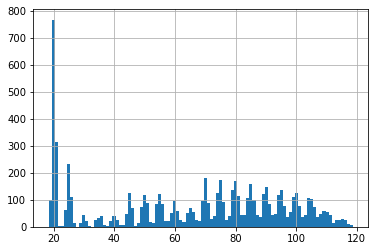

In [14]:
#Сравним распределения величин ежемесячных платежей (MonthlyCharges) всех клиентов
data_all['MonthlyCharges'].hist(bins=100)

<AxesSubplot:>

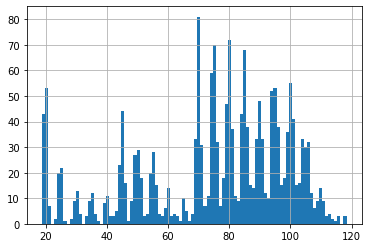

In [15]:
#Сравним распределения величин ежемесячных платежей (MonthlyCharges) по тем, кто ушёл
data_gone['MonthlyCharges'].hist(bins=100)

Явно видно, что у тех, кто ушёл, значительно больше доля клиентов с высокой ежемесячной платой (70 долларов/месяц и выше). Возможно, потому и ушли.

Посчитаем статистики: средние, минимальные и максимальные значения, медиану и величины 25%- и 75%-квартилей

In [16]:
data_gone['MonthlyCharges'].describe()

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64

In [17]:
data_all['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

У ушедших все значения, кроме максимального, превышают аналогичные в общей группе.

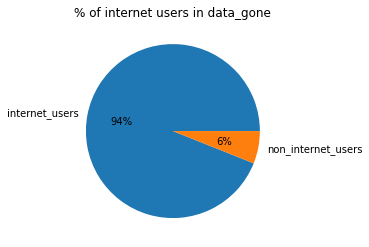

In [18]:
non_internet_users_gone = data_gone['InternetService'].isna().sum()
total_gone = len(data_gone)
labels = ['internet_users', 'non_internet_users']
x = [1-non_internet_users_gone/total_gone, non_internet_users_gone/total_gone]
fig, ax = plt.subplots()
ax.pie(x, labels = labels, autopct='%.0f%%')
ax.set_title('% of internet users in data_gone')
plt.show()

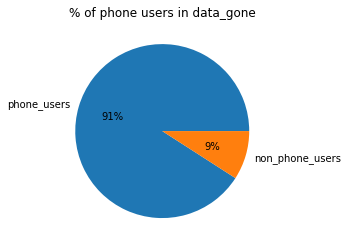

In [19]:
non_phone_users_gone = data_gone['MultipleLines'].isna().sum()
labels = ['phone_users', 'non_phone_users']
x = [1-non_phone_users_gone/total_gone, non_phone_users_gone/total_gone]
fig, ax = plt.subplots()
ax.pie(x, labels = labels, autopct='%.0f%%')
ax.set_title('% of phone users in data_gone')
plt.show()

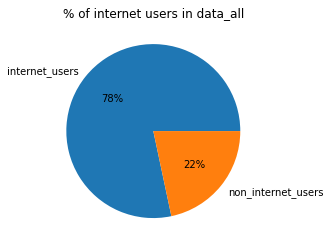

In [20]:
non_internet_users_all = data_all['InternetService'].isna().sum()
total_all = len(data_all)
labels = ['internet_users', 'non_internet_users']
x = [1-non_internet_users_all/total_all, non_internet_users_all/total_all]
fig, ax = plt.subplots()
ax.pie(x, labels = labels, autopct='%.0f%%')
ax.set_title('% of internet users in data_all')
plt.show()

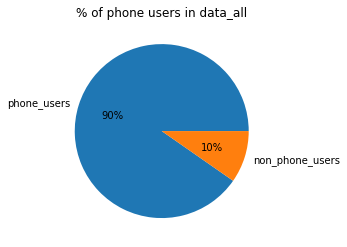

In [21]:
non_phone_users_all = data_all['MultipleLines'].isna().sum()
labels = ['phone_users', 'non_phone_users']
x = [1-non_phone_users_all/total_all, non_phone_users_all/total_all]
fig, ax = plt.subplots()
ax.pie(x, labels = labels, autopct='%.0f%%')
ax.set_title('% of phone users in data_all')
plt.show()

Доля интернет-пользователей в ушедших заметно выше, чем в общей группе. У пользователей телефонов сильной разницы нет в обоих группах.

Теперь вернемся к препроцессингу. Обратимся к целевой переменной:

In [22]:
contract['EndDate']

0                        No
1                        No
2       2019-12-01 00:00:00
3                        No
4       2019-11-01 00:00:00
               ...         
7038                     No
7039                     No
7040                     No
7041    2019-11-01 00:00:00
7042                     No
Name: EndDate, Length: 7043, dtype: object

In [23]:
(contract['EndDate'] == 'No').sum()

5174

Ушла большая часть клиентов. Для построения моделей переведем клиентов, которые ушли в 1, а тех, которые остались, в 0, для удобства предсказания.

In [24]:
contract['EndDate'] = (contract['EndDate'] != 'No')*1
contract['EndDate']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: EndDate, Length: 7043, dtype: int32

In [25]:
contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,0,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,0,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,1,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,0,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,1,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,0,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,0,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,0,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,1,Month-to-month,Yes,Mailed check,74.40,306.6


Begin Date нас не интересует, потому что у нас есть более информативный столбец EndDate

In [26]:
contract = contract.rename(columns={'EndDate': 'End_of_contract'})
contract

,customerID,BeginDate,End_of_contract,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,0,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,0,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,1,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,0,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,1,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,0,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,0,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,0,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,1,Month-to-month,Yes,Mailed check,74.40,306.6


In [27]:
del contract['BeginDate']

Также столбцы с безбумажной оплатой, методом оплаты и месячными расходами е предствляют интереса для задачи оттока.

In [28]:
del contract['PaperlessBilling']

In [29]:
del contract['PaymentMethod']

In [30]:
del contract['MonthlyCharges']

Столбец MonthlyCharges можно использовать для анализа данных (как в дополнительной задаче). Но для построения мрдели можно оставиить только TotalCharges, потому что этот столбец уже включает в себя все оплаты, и из него можно вывести среднее по месяцам, если потребуется.

Столбецы PaperlessBilling и PaymentMethod явно коррелируют друг с другом и с точки зрения аналитика (меня) не могут повлиять, уйдет ли клиент или нет.

In [31]:
contract

,customerID,End_of_contract,Type,TotalCharges
0,7590-VHVEG,0,Month-to-month,29.85
1,5575-GNVDE,0,One year,1889.5
2,3668-QPYBK,1,Month-to-month,108.15
3,7795-CFOCW,0,One year,1840.75
4,9237-HQITU,1,Month-to-month,151.65
...,...,...,...,...
7038,6840-RESVB,0,One year,1990.5
7039,2234-XADUH,0,One year,7362.9
7040,4801-JZAZL,0,Month-to-month,346.45
7041,8361-LTMKD,1,Month-to-month,306.6


In [32]:
contract['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [33]:
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'],errors='coerce')
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       7043 non-null   object 
 1   End_of_contract  7043 non-null   int32  
 2   Type             7043 non-null   object 
 3   TotalCharges     7032 non-null   float64
dtypes: float64(1), int32(1), object(2)
memory usage: 192.7+ KB


<AxesSubplot:>

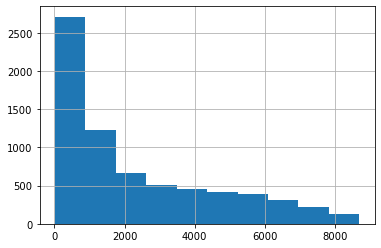

In [34]:
contract['TotalCharges'].hist()


**Проанизируем таблицу internet:**

In [35]:
internet.tail(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
5507,6894-LFHLY,Fiber optic,No,No,No,No,No,No
5508,9767-FFLEM,Fiber optic,No,No,No,No,No,No
5509,0639-TSIQW,Fiber optic,Yes,Yes,Yes,No,Yes,No
5510,8456-QDAVC,Fiber optic,No,No,No,No,Yes,No
5511,7750-EYXWZ,DSL,No,Yes,Yes,Yes,Yes,Yes
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No
5516,3186-AJIEK,Fiber optic,Yes,No,Yes,Yes,Yes,Yes


In [36]:
internet.sample(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
1582,7639-OPLNG,DSL,Yes,Yes,Yes,Yes,Yes,No
3965,7159-NOKYQ,Fiber optic,No,Yes,Yes,No,No,Yes
2387,5151-HQRDG,DSL,Yes,No,No,No,No,No
2602,0337-CNPZE,Fiber optic,No,Yes,Yes,No,Yes,Yes
1177,8898-KASCD,DSL,No,No,Yes,Yes,No,No
1876,2884-GBPFB,Fiber optic,No,No,No,No,No,No
4339,2404-JIBFC,DSL,Yes,No,Yes,Yes,Yes,Yes
5334,9451-LPGOO,Fiber optic,No,No,No,No,No,Yes
488,2731-GJRDG,Fiber optic,Yes,No,Yes,Yes,Yes,Yes
3710,9518-IMLHK,DSL,Yes,Yes,Yes,Yes,Yes,No


In [37]:
internet.isna().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [38]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [39]:
internet.describe()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,9057-MSWCO,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


In [40]:
internet.duplicated().sum()

0

<AxesSubplot:>

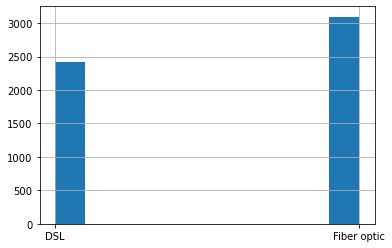

In [41]:
internet['InternetService'].hist()

In [42]:
internet['OnlineSecurity'] = (internet['OnlineSecurity'] != 'No')*1
internet['OnlineBackup'] = (internet['OnlineBackup'] != 'No')*1
internet['DeviceProtection'] = (internet['DeviceProtection'] != 'No')*1
internet['TechSupport'] = (internet['TechSupport'] != 'No')*1
internet['StreamingTV'] = (internet['StreamingTV'] != 'No')*1
internet['StreamingMovies'] = (internet['StreamingMovies'] != 'No')*1
internet

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,0,1,0,0,0,0
1,5575-GNVDE,DSL,1,0,1,0,0,0
2,3668-QPYBK,DSL,1,1,0,0,0,0
3,7795-CFOCW,DSL,1,0,1,1,0,0
4,9237-HQITU,Fiber optic,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,1,0,1,1,1,1
5513,2234-XADUH,Fiber optic,0,1,1,0,1,1
5514,4801-JZAZL,DSL,1,0,0,0,0,0
5515,8361-LTMKD,Fiber optic,0,0,0,0,0,0


**Проанализируем таблицу personal:**

In [43]:
personal.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
7033,9767-FFLEM,Male,0,No,No
7034,0639-TSIQW,Female,0,No,No
7035,8456-QDAVC,Male,0,No,No
7036,7750-EYXWZ,Female,0,No,No
7037,2569-WGERO,Female,0,No,No
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No
7042,3186-AJIEK,Male,0,No,No


In [44]:
personal.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
2311,8552-OBVRU,Female,1,Yes,Yes
6980,0786-VSSUD,Male,1,No,No
6846,6618-RYATB,Female,0,No,No
2997,1891-FZYSA,Male,1,Yes,No
2388,9822-OAOVB,Female,0,No,No
6187,0224-NIJLP,Male,0,Yes,Yes
6721,6898-RBTLU,Female,0,Yes,Yes
3020,5199-FPUSP,Male,0,No,Yes
3055,0617-FHSGK,Male,0,No,Yes
6371,1535-VTJOQ,Female,0,No,No


In [45]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [46]:
personal.describe()

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [47]:
personal.duplicated().sum()

0

In [48]:
personal.isna().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [49]:
personal['Partner'] = (personal['Partner'] != 'No')*1
personal['Dependents'] = (personal['Dependents'] != 'No')*1
personal

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,1,0
1,5575-GNVDE,Male,0,0,0
2,3668-QPYBK,Male,0,0,0
3,7795-CFOCW,Male,0,0,0
4,9237-HQITU,Female,0,0,0
...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1
7039,2234-XADUH,Female,0,1,1
7040,4801-JZAZL,Female,0,1,1
7041,8361-LTMKD,Male,1,1,0


**Проанализируем таблицу phone:**

In [50]:
phone.tail(10)

,customerID,MultipleLines
6351,3605-JISKB,Yes
6352,6894-LFHLY,Yes
6353,9767-FFLEM,No
6354,0639-TSIQW,Yes
6355,8456-QDAVC,No
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes
6360,3186-AJIEK,No


In [51]:
phone.sample(10)

,customerID,MultipleLines
3702,0628-CNQRM,No
7,9763-GRSKD,No
6345,7398-LXGYX,Yes
1973,7101-HRBLJ,No
530,8752-IMQOS,No
6188,6127-IYJOZ,No
1461,6265-SXWBU,Yes
1839,8861-HGGKB,Yes
2605,8922-NPKBJ,No
3824,9027-YFHQJ,Yes


In [52]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [53]:
phone.describe()

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5103-MHMHY,No
freq,1,3390


In [54]:
phone.duplicated().sum()

0

In [55]:
phone.isna().sum()

customerID       0
MultipleLines    0
dtype: int64

In [56]:
phone['MultipleLines'] = (phone['MultipleLines'] != 'No')*1
phone

,customerID,MultipleLines
0,5575-GNVDE,0
1,3668-QPYBK,0
2,9237-HQITU,0
3,9305-CDSKC,1
4,1452-KIOVK,1
...,...,...
6356,2569-WGERO,0
6357,6840-RESVB,1
6358,2234-XADUH,1
6359,8361-LTMKD,1


In [57]:
phone.isna().sum()

customerID       0
MultipleLines    0
dtype: int64

**Объединение столбцов:**

In [58]:
df = contract.merge(internet, on=['customerID'], how='outer')

In [59]:
df

,customerID,End_of_contract,Type,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,0,Month-to-month,29.85,DSL,0.0,1.0,0.0,0.0,0.0,0.0
1,5575-GNVDE,0,One year,1889.50,DSL,1.0,0.0,1.0,0.0,0.0,0.0
2,3668-QPYBK,1,Month-to-month,108.15,DSL,1.0,1.0,0.0,0.0,0.0,0.0
3,7795-CFOCW,0,One year,1840.75,DSL,1.0,0.0,1.0,1.0,0.0,0.0
4,9237-HQITU,1,Month-to-month,151.65,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,One year,1990.50,DSL,1.0,0.0,1.0,1.0,1.0,1.0
7039,2234-XADUH,0,One year,7362.90,Fiber optic,0.0,1.0,1.0,0.0,1.0,1.0
7040,4801-JZAZL,0,Month-to-month,346.45,DSL,1.0,0.0,0.0,0.0,0.0,0.0
7041,8361-LTMKD,1,Month-to-month,306.60,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
df.duplicated().sum()

0

In [61]:
df = df.fillna(0)
df.isna().sum()

customerID          0
End_of_contract     0
Type                0
TotalCharges        0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [62]:
df.sample(20)

,customerID,End_of_contract,Type,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
6660,1447-GIQMR,1,Month-to-month,69.15,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0
5436,7246-ZGQDF,0,Month-to-month,54.50,DSL,1.0,0.0,0.0,1.0,0.0,0.0
6167,3154-CFSZG,0,Month-to-month,4137.20,Fiber optic,1.0,0.0,1.0,0.0,0.0,1.0
4755,8849-AYPTR,0,Month-to-month,2964.05,Fiber optic,0.0,0.0,0.0,0.0,1.0,1.0
5341,2982-IHMFT,1,Month-to-month,74.45,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0
5993,2080-GKCWQ,0,Month-to-month,151.75,Fiber optic,0.0,1.0,0.0,0.0,0.0,0.0
2617,4588-YBNIB,1,Month-to-month,19.60,0,0.0,0.0,0.0,0.0,0.0,0.0
2627,4213-HKBJO,0,Two year,826.10,0,0.0,0.0,0.0,0.0,0.0,0.0
4470,8242-JSVBO,0,Month-to-month,322.50,DSL,0.0,0.0,0.0,0.0,0.0,0.0
2777,4860-YZGZM,0,Month-to-month,185.40,0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
df1 = df.merge(personal, on=['customerID'], how='outer')

In [64]:
df1

,customerID,End_of_contract,Type,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,0,Month-to-month,29.85,DSL,0.0,1.0,0.0,0.0,0.0,0.0,Female,0,1,0
1,5575-GNVDE,0,One year,1889.50,DSL,1.0,0.0,1.0,0.0,0.0,0.0,Male,0,0,0
2,3668-QPYBK,1,Month-to-month,108.15,DSL,1.0,1.0,0.0,0.0,0.0,0.0,Male,0,0,0
3,7795-CFOCW,0,One year,1840.75,DSL,1.0,0.0,1.0,1.0,0.0,0.0,Male,0,0,0
4,9237-HQITU,1,Month-to-month,151.65,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Female,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,One year,1990.50,DSL,1.0,0.0,1.0,1.0,1.0,1.0,Male,0,1,1
7039,2234-XADUH,0,One year,7362.90,Fiber optic,0.0,1.0,1.0,0.0,1.0,1.0,Female,0,1,1
7040,4801-JZAZL,0,Month-to-month,346.45,DSL,1.0,0.0,0.0,0.0,0.0,0.0,Female,0,1,1
7041,8361-LTMKD,1,Month-to-month,306.60,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Male,1,1,0


In [65]:
df1.isna().sum()

customerID          0
End_of_contract     0
Type                0
TotalCharges        0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
dtype: int64

In [66]:
df1 = df1.fillna(0)
df.isna().sum()

customerID          0
End_of_contract     0
Type                0
TotalCharges        0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [67]:
df1.duplicated().sum()

0

In [68]:
merged_df = df1.merge(phone, on=['customerID'], how='outer')

In [69]:
merged_df

,customerID,End_of_contract,Type,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,0,Month-to-month,29.85,DSL,0.0,1.0,0.0,0.0,0.0,0.0,Female,0,1,0,NaN
1,5575-GNVDE,0,One year,1889.50,DSL,1.0,0.0,1.0,0.0,0.0,0.0,Male,0,0,0,0.0
2,3668-QPYBK,1,Month-to-month,108.15,DSL,1.0,1.0,0.0,0.0,0.0,0.0,Male,0,0,0,0.0
3,7795-CFOCW,0,One year,1840.75,DSL,1.0,0.0,1.0,1.0,0.0,0.0,Male,0,0,0,NaN
4,9237-HQITU,1,Month-to-month,151.65,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Female,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,One year,1990.50,DSL,1.0,0.0,1.0,1.0,1.0,1.0,Male,0,1,1,1.0
7039,2234-XADUH,0,One year,7362.90,Fiber optic,0.0,1.0,1.0,0.0,1.0,1.0,Female,0,1,1,1.0
7040,4801-JZAZL,0,Month-to-month,346.45,DSL,1.0,0.0,0.0,0.0,0.0,0.0,Female,0,1,1,NaN
7041,8361-LTMKD,1,Month-to-month,306.60,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Male,1,1,0,1.0


In [70]:
merged_df.isna().sum()

customerID            0
End_of_contract       0
Type                  0
TotalCharges          0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
MultipleLines       682
dtype: int64

In [71]:
merged_df.duplicated().sum()

0

In [72]:
merged_df = merged_df.fillna(0)
merged_df.isna().sum()

customerID          0
End_of_contract     0
Type                0
TotalCharges        0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
dtype: int64

In [73]:
len(merged_df)

7043

In [74]:
merged_df = merged_df.set_index('customerID')

Перед построением модели проверим знакомость признаков, наличие коллинеарности.


In [75]:
merged_df.columns

Index(['End_of_contract', 'Type', 'TotalCharges', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'MultipleLines'],
      dtype='object')

In [76]:
# Find all correlations with the score and sort 
correlations_data = merged_df.corr()['End_of_contract'].sort_values()
correlations_data

TotalCharges       -0.198324
OnlineSecurity     -0.171226
TechSupport        -0.164674
Dependents         -0.164221
Partner            -0.150448
OnlineBackup       -0.082255
DeviceProtection   -0.066160
MultipleLines       0.040102
StreamingMovies     0.061382
StreamingTV         0.063228
SeniorCitizen       0.150889
End_of_contract     1.000000
Name: End_of_contract, dtype: float64

In [77]:
merged_df.columns

Index(['End_of_contract', 'Type', 'TotalCharges', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'MultipleLines'],
      dtype='object')

In [78]:
merged_df.shape

(7043, 15)

**Вывод:** 

1. пропуски и дубликаты не обнаружены во всех таблицах

2. удалены неинформативные столбцы

3. целевой признак приведен к 0 и 1, а также перевели в 0 и 1 признаки со значениями Yes и No для удобства объединения и сравнения

4. объединили таблицы

# Шаг 2. Моделирование

In [79]:
pd.options.mode.chained_assignment = None  # default='warn'
numeric_subset = merged_df[['TotalCharges', 
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'SeniorCitizen', 'Partner',
    'Dependents', 'MultipleLines']]

# Select the categorical columns
categorical_subset = merged_df[['Type', 'InternetService','gender']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
X = pd.concat([numeric_subset, categorical_subset], axis = 1)
y = merged_df['End_of_contract']

In [80]:
merged_df.columns

Index(['End_of_contract', 'Type', 'TotalCharges', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'MultipleLines'],
      dtype='object')

In [81]:
pd.options.mode.chained_assignment = None  # default='warn'



X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size = 0.25, random_state=42)

numeric = ['TotalCharges']

scaler = StandardScaler()
scaler.fit(X_train[numeric])
X_train[numeric] = scaler.transform(X_train[numeric])
X_valid[numeric] = scaler.transform(X_valid[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

X_train

,TotalCharges,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,SeniorCitizen,Partner,Dependents,MultipleLines,Type_Month-to-month,Type_One year,Type_Two year,InternetService_0,InternetService_DSL,InternetService_Fiber optic,gender_Female,gender_Male
customerID,,,,,,,,,,,,,,,,,,,
6776-TLWOI,-0.979128,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,1,0,0,1,0,0,0,1
0036-IHMOT,1.491909,0.0,1.0,1.0,1.0,1.0,1.0,0,1,1,0.0,0,1,0,0,0,1,1,0
2843-CQMEG,-0.469340,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0.0,1,0,0,0,1,0,0,1
3247-MHJKM,-0.998725,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,1,0,0,1,0,0,0,1
1194-BHJYC,0.662117,1.0,0.0,1.0,1.0,1.0,1.0,0,1,0,0.0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271-SJBGZ,-0.774806,0.0,0.0,1.0,1.0,0.0,1.0,1,0,0,0.0,1,0,0,0,1,0,0,1
5977-CKHON,0.777070,0.0,0.0,1.0,0.0,0.0,1.0,0,1,1,1.0,1,0,0,0,0,1,1,0
3635-JBPSG,-0.741202,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0,0.0,0,0,1,0,1,0,1,0


Визуализируем матрицу корреляций и ввиде тепловой карты:

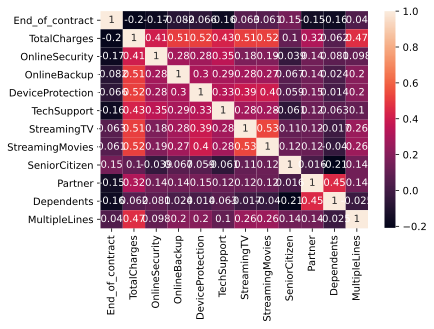

In [82]:
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

cols = ['End_of_contract', 'Type', 'TotalCharges', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'MultipleLines']
hm = sns.heatmap(merged_df[cols].corr(),
                 cbar=True,
                 annot=True)

In [83]:
merged_df.columns

Index(['End_of_contract', 'Type', 'TotalCharges', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'MultipleLines'],
      dtype='object')

Попробуем испытать несколько моделей:

**Дерево решений без подбора параметров**

In [84]:
decision_tree_classifier = DecisionTreeClassifier(random_state=0)
decision_tree_classifier.fit(X_train, y_train)
#predictions_valid = decision_tree_classifier.predict(X_valid)
print('ROC-AUC:', roc_auc_score(y_valid, decision_tree_classifier.predict_proba(X_valid)[:, 1]))

ROC-AUC: 0.6488972000922202


**Дерево решений с подбором параметров**

In [85]:
from sklearn.model_selection import GridSearchCV


decision_tree_classifier = DecisionTreeClassifier(random_state=0)

#Создадим словарь параметров для будущей модели

parametrs = { 'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

grid_decision_tree_classifier = GridSearchCV(decision_tree_classifier, parametrs, cv=5)
grid_decision_tree_classifier.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2)})

In [86]:
grid_decision_tree_classifier.best_params_

predictions_valid = grid_decision_tree_classifier.predict(X_valid)
print('ROC-AUC:', roc_auc_score(y_valid, grid_decision_tree_classifier.predict_proba(X_valid)[:, 1]))

ROC-AUC: 0.8023708276763071


**Логистическая регрессия**

In [87]:
logistic_regression = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)
print('ROC-AUC:', roc_auc_score(y_valid, logistic_regression.predict_proba(X_valid)[:, 1]))

ROC-AUC: 0.8103927043574044


**Случайный лес без подбора параметров**

In [88]:
model_forest_classifier= RandomForestClassifier(random_state=12345)
model_forest_classifier.fit(X_train, y_train)
predictions_valid = model_forest_classifier.predict(X_valid)
print('ROC-AUC:', roc_auc_score(y_valid, model_forest_classifier.predict_proba(X_valid)[:, 1]))

ROC-AUC: 0.7934305914901246


Проверим признаки на мультиколлинеарность и т.д.

In [89]:
from scipy.stats import spearmanr
from scipy.cluster import hierarchy

from sklearn.inspection import permutation_importance

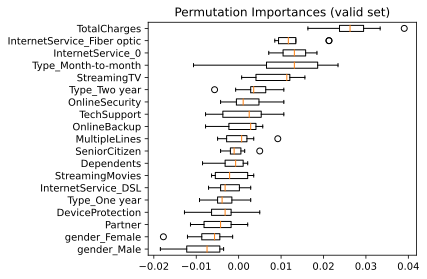

In [90]:
result = permutation_importance(model_forest_classifier, X_valid, y_valid, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_valid.columns[sorted_idx])
ax.set_title("Permutation Importances (valid set)")
fig.tight_layout()
plt.show()

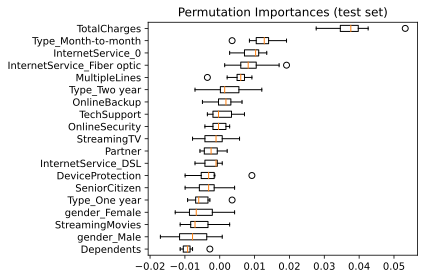

In [91]:
result = permutation_importance(model_forest_classifier, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

На графиках показано, какие признаки являются наиболее значимыми для модели классификации.

**Случайный лес с подбором параметров**

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model_forest_classifier= RandomForestClassifier(random_state=12345)

parametrs = { 'n_estimators': range (10, 20, 11),
              'max_depth': range (1,11),
              'min_samples_leaf': range (1,5)}

grid_model_forest_classifier = GridSearchCV(model_forest_classifier, parametrs, cv=3)
grid_model_forest_classifier.fit(X_train, y_train)
grid_model_forest_classifier.best_params_

print('ROC-AUC:', roc_auc_score(y_valid, grid_model_forest_classifier.predict_proba(X_valid)[:, 1]))

ROC-AUC: 0.8277429105720214


**Catboost**

In [93]:
cat = CatBoostClassifier(verbose=100,
                           random_state=42,
                           learning_rate=0.01,
                           early_stopping_rounds=200,
                           eval_metric='AUC'
                           )

In [94]:
cat.fit(X_train, y_train) 
 
print('ROC-AUC:', roc_auc_score(y_valid, cat.predict_proba(X_valid)[:, 1]))

0:	total: 153ms	remaining: 2m 32s
100:	total: 860ms	remaining: 7.65s
200:	total: 1.52s	remaining: 6.05s
300:	total: 2.14s	remaining: 4.97s
400:	total: 2.81s	remaining: 4.2s
500:	total: 3.45s	remaining: 3.43s
600:	total: 4.12s	remaining: 2.74s
700:	total: 4.8s	remaining: 2.05s
800:	total: 5.48s	remaining: 1.36s
900:	total: 6.16s	remaining: 677ms
999:	total: 6.82s	remaining: 0us
ROC-AUC: 0.8355188667161922


In [95]:
hyper_params = {
    "max_depth": 8,
    "num_leaves": 128}
    
gbm = lgb.LGBMClassifier(**hyper_params)
gbm.fit(X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric='AUC',
        early_stopping_rounds=1000)

print('ROC-AUC:', roc_auc_score(y_valid, gbm.predict_proba(X_valid)[:, 1]))

[1]	valid_0's auc: 0.813508	valid_0's binary_logloss: 0.553235
Training until validation scores don't improve for 1000 rounds
[2]	valid_0's auc: 0.818906	valid_0's binary_logloss: 0.530742
[3]	valid_0's auc: 0.818944	valid_0's binary_logloss: 0.513201
[4]	valid_0's auc: 0.822426	valid_0's binary_logloss: 0.497859
[5]	valid_0's auc: 0.824719	valid_0's binary_logloss: 0.486482
[6]	valid_0's auc: 0.826324	valid_0's binary_logloss: 0.476547
[7]	valid_0's auc: 0.825718	valid_0's binary_logloss: 0.468993
[8]	valid_0's auc: 0.828122	valid_0's binary_logloss: 0.461581
[9]	valid_0's auc: 0.828673	valid_0's binary_logloss: 0.456539
[10]	valid_0's auc: 0.828884	valid_0's binary_logloss: 0.451859
[11]	valid_0's auc: 0.828994	valid_0's binary_logloss: 0.448316
[12]	valid_0's auc: 0.829206	valid_0's binary_logloss: 0.44555
[13]	valid_0's auc: 0.829338	valid_0's binary_logloss: 0.443461
[14]	valid_0's auc: 0.829126	valid_0's binary_logloss: 0.442196
[15]	valid_0's auc: 0.829266	valid_0's binary_loglo

**Вывод:** наилучший результат на валидационной выборке выдает Catboost, проверим его качество на тестовой выборке

# Проверка качества модели

In [96]:
print('ROC-AUC:', roc_auc_score(y_test, cat.predict_proba(X_test)[:, 1]))

ROC-AUC: 0.8577341704017306


Виртуализируем ROC-AUC:

In [97]:
score = cat.predict_proba(X_test)[:,1]

In [98]:
fpr, tpr, thr = roc_curve(y_test,score)

In [99]:
roc = pd.DataFrame({'fpr':fpr,'tpr':tpr,'thr':thr})

<Figure size 432x288 with 0 Axes>

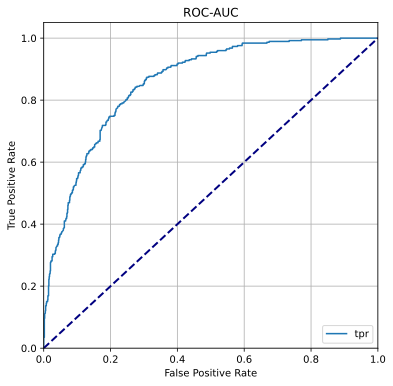

In [100]:
plt.figure()
lw = 2
roc.plot(x='fpr',y='tpr',figsize=(6,6),grid=True)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC')
plt.legend(loc="lower right")
plt.show()

# Результаты исследования

Мы провели препроцессинг и анализ данных, исследовали несколько моделей и проверили их качество на ROC-AUC. Наилучшей моделью является модель Catboost, на тестовой выборке ее качество равно 0.856. Я не стала подбирать оптимальный порог, потому что он не приносит существенных изменений в качество.